In [1]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
TEST_SIZE = 0.4

c:\Users\karbi\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\karbi\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\karbi\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in t

In [2]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    images = []
    labels = []

    # getting the root directory of all the data
    root = os.path.join(os.getcwd(), data_dir)

    # getting the list of all the subdirectories within the data folder each of which is a label for our model
    subdirs = sorted([int(i) for i in os.listdir(root)])

    for subdir in subdirs:
        # we'll count how many image does a catefory/label contains
#         count = 0
        for filename in os.listdir(os.path.join(root, str(subdir))):
            # loading the image file using opencv module
            img=cv2.imread(os.path.join(root,str(subdir),filename))

            # resizing the image matrix to make suitable for feeding into neural net
#             resized_img = np.resize(img,(IMG_WIDTH, IMG_HEIGHT, 3))
            resized_img = cv2.resize(img,(IMG_WIDTH, IMG_HEIGHT), interpolation = cv2.INTER_AREA)
            # storing the image array into a list
            images.append(resized_img)
            
            # as each subdir name indicates a category of sign so it's our label
            labels.append(subdir)
#             count += 1

        # as each subdir name indicates a category of sign so it's our label
        # and we'll enter the label as many times in our list as many images it have
#         labels += [subdir]*count
    return (images, labels)

In [3]:
def get_model(NUM_CATEGORIES):
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    # NUM_CATEGORIES = 3

    model = tf.keras.models.Sequential([

        # Convolutional layer. learns 32 filters using 3x3 kernel
        tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)),
        # Max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.2),
        
        # Convolutional layer. learns 32 filters using 3x3 kernel
        tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
        # Max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.2),
        
#         # Convolutional layer. learns 32 filters using 3x3 kernel
#         tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same', padding='same'),
#         # Max-pooling layer, using 2x2 pool size
#         tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
# # #         tf.keras.layers.Dropout(0.2),
        
#         # Convolutional layer. learns 32 filters using 3x3 kernel
#         tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same', padding='same'),
#         # Max-pooling layer, using 2x2 pool size
#         tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
# #         tf.keras.layers.Dropout(0.2),
        
#         # Convolutional layer. learns 32 filters using 3x3 kernel
#         tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same', padding='same'),
#         # Max-pooling layer, using 2x2 pool size
#         tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
# #         tf.keras.layers.Dropout(0.2),
        
        # Flatten units
        tf.keras.layers.Flatten(),

        # Adding a hidden layer with 128 neurons
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        # Adding a hidden layer with 128 neurons
#         tf.keras.layers.Dense(512, activation = 'relu'),
#         # Adding dropout to remove random number of neurons from the net on every iteration
#         # It'll help us to avoid overfitting
#         tf.keras.layers.Dropout(0.2),

        # Adding an output layer with N neurons for all categories
        tf.keras.layers.Dense(NUM_CATEGORIES, activation = 'softmax')
    ])

    # Training the neural net
    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [4]:
# Get image arrays and labels for all image files
images_2, labels_2 = load_data('gtsrb-small')

labels_2 = tf.keras.utils.to_categorical(labels_2)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    np.array(images_2), np.array(labels_2), test_size=TEST_SIZE
)
type(np.array(images_2))

numpy.ndarray

In [5]:
print(x_train_2[0])
# Get a compiled neural network
model_2 = get_model(3)
print(y_train_2.shape, x_train_2.shape)
# Fit model on training data
model_2.fit(x_train_2, y_train_2, epochs=EPOCHS)

# Evaluate neural network performance
model_2.evaluate(x_test_2,  y_test_2, verbose=2)

[[[ 71  74  75]
  [ 91  92  91]
  [109 107 106]
  ...
  [ 37  35  36]
  [ 37  34  33]
  [ 41  38  38]]

 [[107 102 101]
  [121 119 120]
  [128 127 126]
  ...
  [ 40  39  42]
  [ 37  36  39]
  [ 40  38  41]]

 [[115 111 110]
  [131 129 129]
  [135 134 132]
  ...
  [ 47  46  49]
  [ 43  44  47]
  [ 42  42  43]]

 ...

 [[ 49  50  39]
  [ 51  56  46]
  [ 51  55  47]
  ...
  [ 49  76  88]
  [ 41  64  63]
  [ 49  71  79]]

 [[ 45  48  38]
  [ 46  51  42]
  [ 49  54  44]
  ...
  [ 43  67  74]
  [ 38  56  55]
  [ 44  61  59]]

 [[ 49  54  45]
  [ 45  49  44]
  [ 45  50  40]
  ...
  [ 42  63  67]
  [ 42  55  52]
  [ 44  56  49]]]
(504, 3) (504, 30, 30, 3)


c:\Users\karbi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7143 - loss: 23.7740
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9683 - loss: 0.3919
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9742 - loss: 0.0995
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9921 - loss: 0.0651
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9901 - loss: 0.0684
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9901 - loss: 0.0477
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9881 - loss: 0.0450
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9901 - loss: 0.0363
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9940 - loss: 0.0142
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9980 - loss: 0.0023  
11/11 - 0s - 39ms/step - accuracy: 1.0000 - loss: 0.0015


[0.0014787815744057298, 1.0]

In [6]:
# Get image arrays and labels for all image files
images, labels = load_data('gtsrb')

In [7]:
a = np.array(images)
np.save("images.npy", a)
a.shape

(26640, 30, 30, 3)

In [8]:
b = np.array(labels)
np.save("labels.npy", b)
b.shape

(26640,)

In [9]:
images = np.load("images.npy")
images.shape

(26640, 30, 30, 3)

In [10]:
labels = np.load("labels.npy")
labels.shape
# labels

(26640,)

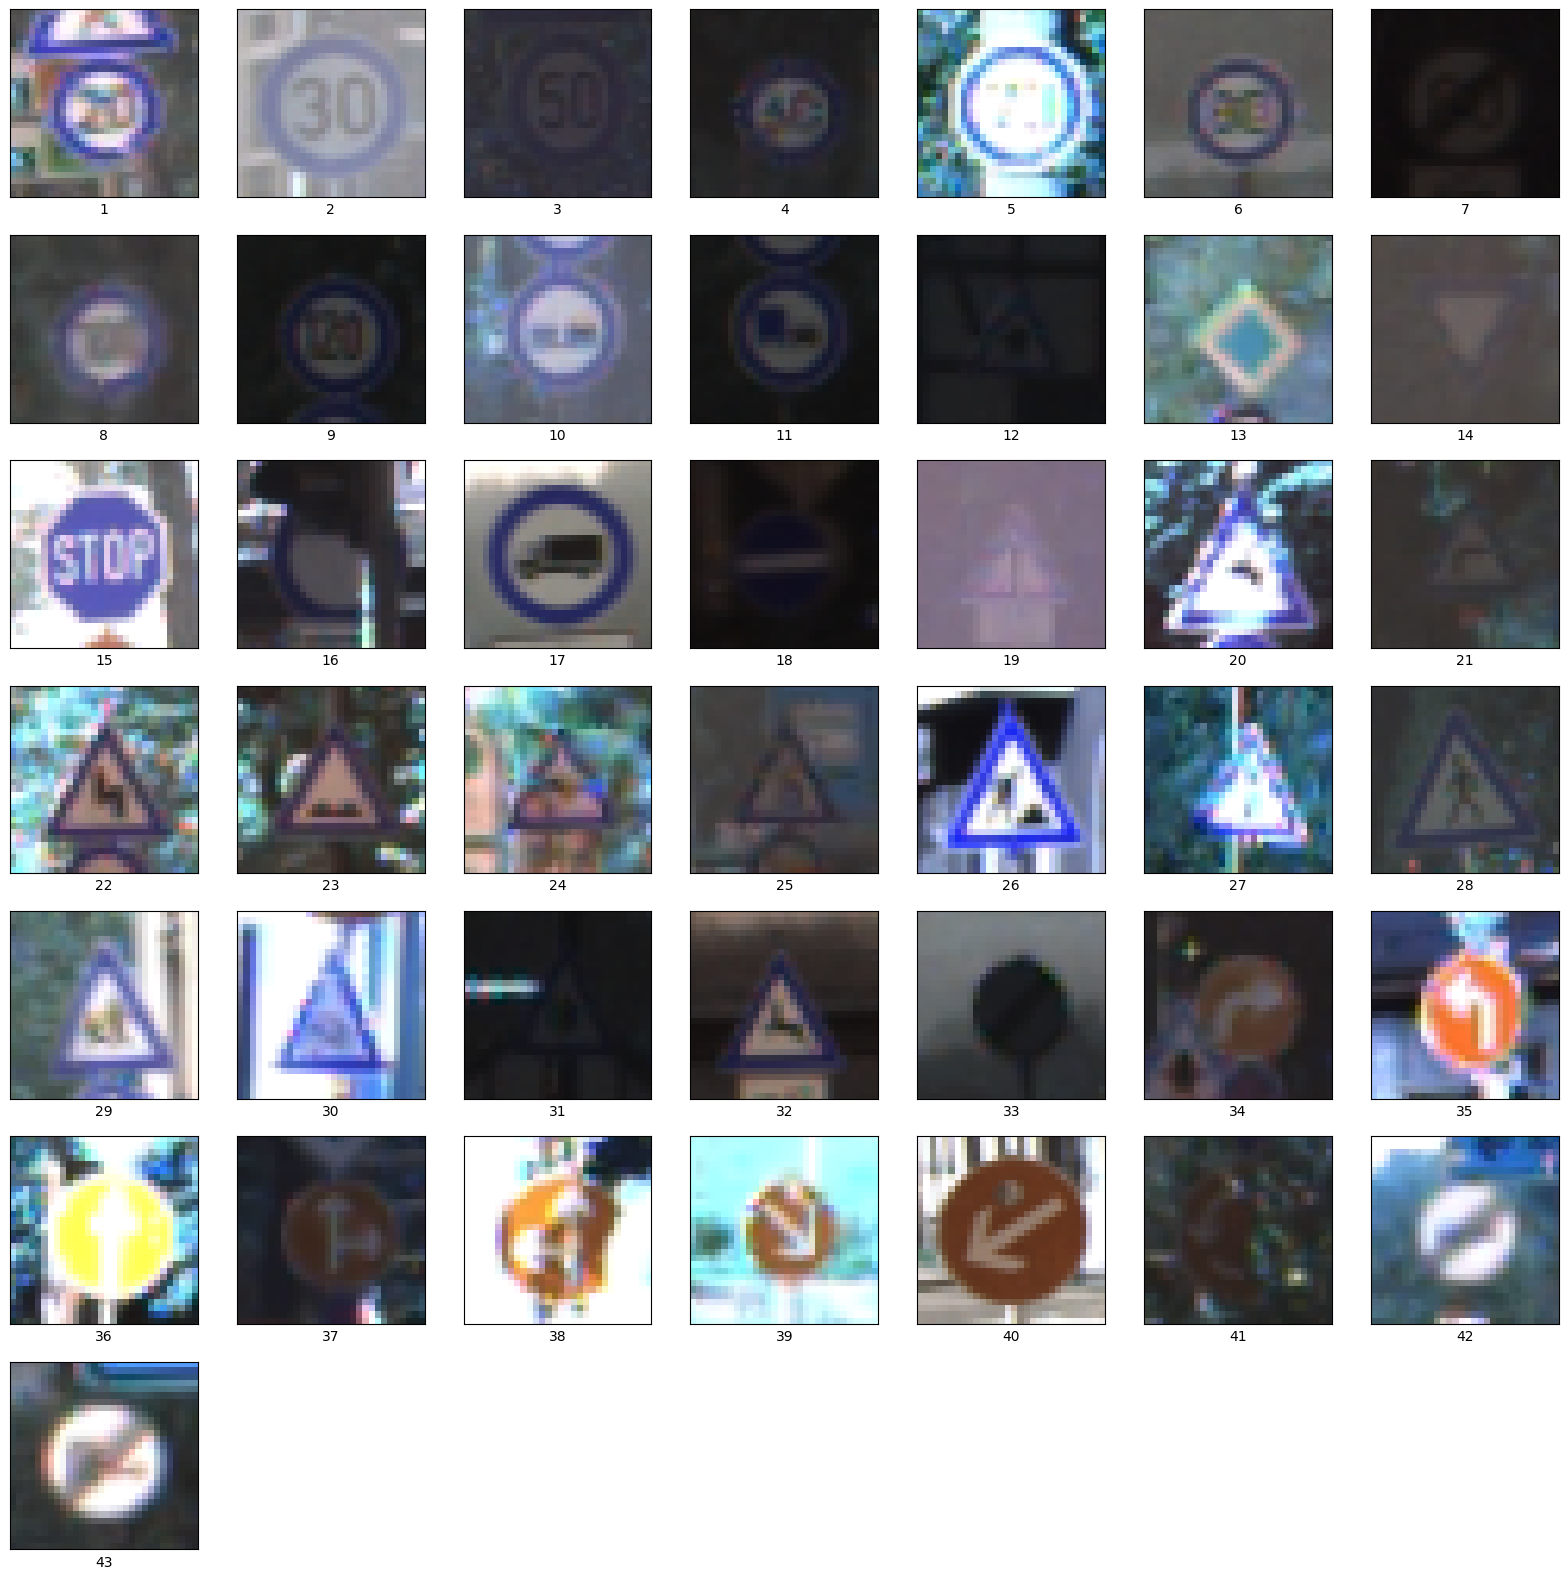

In [12]:
plt.figure(figsize=(20,20))
for i in range(43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = np.where(labels == i)[0][0]
    plt.imshow(images[index], cmap=plt.cm.binary)
    plt.xlabel(i+1)
plt.show()

In [13]:
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)
labels.shape

(26640, 43)

In [14]:

# print(len(set(labels)))
# plt.figure()
# plt.imshow(images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()
# Split data into training and testing sets


# Get a compiled neural network
model = get_model(43)


# Fit model on training data
model.fit(x_train, y_train, epochs=EPOCHS)

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3309 - loss: 3.3337
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6821 - loss: 1.0618
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8111 - loss: 0.6128
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8624 - loss: 0.4602
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8915 - loss: 0.3672
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9089 - loss: 0.3083
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9188 - loss: 0.2771
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9255 - loss: 0.2567
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9281 - loss: 0.2453
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9357 - loss: 0.2255
333/333 - 2s - 7ms/step - accuracy: 0.9802 - loss: 0.0773


[0.07726649940013885, 0.9801989197731018]